### **선행지수 전략의 구현**     

증권방송을 보면 지난 밤 미국 시장의 흐름을 보여주면서 오늘 우리나라 주식시장의 흐름을 예측하곤 합니다. "어제 밤 나스닥이 등급했으니, 오늘 주식시장은 활황이 예상된다" 등의 대표적인 사례입니다. 미국 3 대 주가 지수가 코스피 혹은 코스닥 지수의 선행지표라면 오늘 장이 열리기 전에 어제 저녁 미국 시장의 흐름을 보고, 매수/매도 여부를 결정하면 될 것 같습니다. 정말 선행지표가 될까요? 먼저 이 가설이 사실인지 데이터로 확인해보고 싶습니다. 

<br>

미국 지수 데이터는 야후 파이낸스 라이브러리를 이용하여 다운로드 받으면 쉽습니다. 아나콘다 Prompt 에서 pip install yfinance 라고 적어서 설치할 수 도 있고, 쥬피터 노트북상에서는 !pip install yfinance 로 설치할 수 있습니다. 주피터 노트북 설치 코드에는 앞에 느낌표가 있는 것을 유의하세요. 저는 아나콘다 prompt 에서 설치를 선호합니다. 아나콘다 Prompt 에서는 설치 과정을 보여주기 때문에, 설치가 안 되면 어떤 문제가 있는 지도 알 수 있습니다.
```python
(주피터노트북 상에 설치할 경우) !pip install yfinance
그리고 yfinance 를 yf 이름으로 import 합니다.
```

### <br> 3 대 지수의 심볼은 아래와 같습니다. 
나스닥(NASDAQ) 은 '^IXIC', 다우존스(DJIA) 는 '^DJI', 그리고 마지막으로 S&P(S&P500) 는 '^GSPC' 입니다. 이제 2021년 7월부터 2022년 6월까지 1년간 자료를 받아보겠습니다. 성공적으로 데이터가 생성되었습니다. 그리고 우리나라 코스피 지수, 코스닥 지수도 각 심볼을 이용해서 다운로드합니다. 코스피 지수 심볼은 각 '^KS11', 코스닥 지수 심볼은 '^KQ11' 입니다.

In [7]:
import yfinance as yf
import pandas as pd

nasdaq = yf.download('^IXIC', start = '2021-01-01', end = '2021-12-31') # 나즈닥
dowjones = yf.download('^DJI', start = '2021-01-01', end = '2021-12-31') # 다우존스
sp500 =  yf.download('^GSPC', start = '2021-01-01', end = '2021-12-31') # S&P 500
kospi =  yf.download('^KS11', start = '2021-01-01', end = '2021-12-31') # 코스피
kosdaq =  yf.download('^KQ11', start = '2021-01-01', end = '2021-12-31') # 코스닥


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
nasdaq.head().style.set_table_attributes('style="font-size: 12px"').format(precision=1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31 00:00:00,12877.1,12902.1,12821.2,12888.3,12888.3,4771390000
2021-01-04 00:00:00,12958.5,12958.7,12543.2,12698.5,12698.5,6546740000
2021-01-05 00:00:00,12665.7,12828.3,12665.7,12819.0,12819.0,6904420000
2021-01-06 00:00:00,12666.2,12909.6,12650.0,12740.8,12740.8,7648340000
2021-01-07 00:00:00,12867.3,13090.9,12867.3,13067.5,13067.5,6777010000


In [9]:
kospi.head().style.set_table_attributes('style="font-size: 12px"').format(precision=1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00,2874.5,2946.5,2869.1,2944.4,2944.4,1026500
2021-01-05 00:00:00,2943.7,2990.6,2921.8,2990.6,2990.6,1519900
2021-01-06 00:00:00,2993.3,3027.2,2961.4,2968.2,2968.2,1793400
2021-01-07 00:00:00,2980.8,3055.3,2980.8,3031.7,3031.7,1524700
2021-01-08 00:00:00,3040.1,3161.1,3040.1,3152.2,3152.2,1297900


<br>
코스피와 미국 NASDAQ 지수를 흐름을 그래프로 보겠습니다. 두 지수의 크기가 다르므로 이중 Y 축을 이용하겠습니다. 우리나라가 미국에 비하여 9시간 정도 앞서 있으므로 같은 날을 비교하면 우리나라가 선행지표가 됩니다. 따라서 shift 함수를 이용해서 우리나라의 다음날과 미국의 당일을 비교해야 미국이 선행지수가 됩니다. 아래 그림에서 파랑색은 NASDAQ 이고 오렌지색은 KOSPI 입니다. 아래 그래프를 보면 흐름이 많아 달라보입니다.

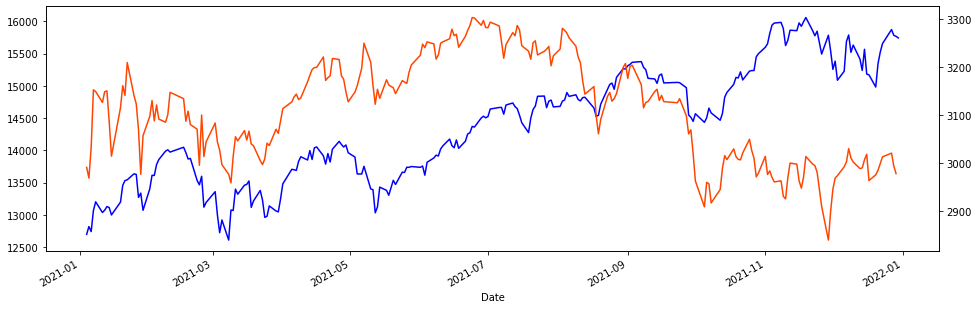

In [16]:
kospi['kospi_close'] = kospi['Close'].shift(-1)
ns_ks = nasdaq.merge(kospi['kospi_close'], left_index=True, right_index=True, how='inner')

ax = ns_ks['Close'].plot(figsize=(16,5), label='SP500', color='blue')
ax2 = ax.twinx()
ax2 = ns_ks['kospi_close'].plot(figsize=(16,5), label='KOSPI', color='orangered')

<br>
이번에는 코스닥과 NASDAQ 지수의 흐름을 비교해보겠습니다. 코스피보다 더 연관성이 높아보입니다. 아래 그림에서 파랑색은 NASDAQ 이고 빨간색은 KOSDAQ 입니다.

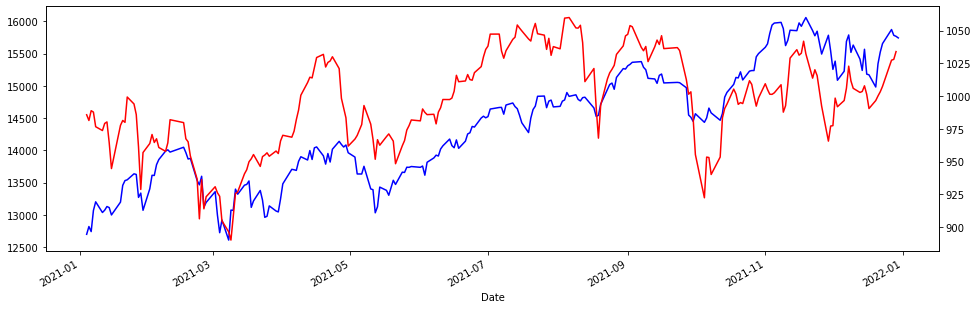

In [17]:
kosdaq['kosdaq_close'] = kosdaq['Close'].shift(-1)
ns_kq = nasdaq.merge(kosdaq['kosdaq_close'], left_index=True, right_index=True, how='inner')

ax = ns_kq['Close'].plot(figsize=(16,5), label='SP500', color='blue')
ax2 = ax.twinx()
ax2 = ns_kq['kosdaq_close'].plot(figsize=(16,5), label='KOSDAQ', color='red')